In [1]:
import math
import time
import sys
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style
import paste as pst
import ot
import seaborn
from anndata import AnnData
import yaml
from pathlib import Path
import os
import random
import torch

from typing import List, Mapping, Optional, Union
import random

/rd2/user/xiacr/spatialGLUE/env/paste/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
torch.cuda.set_device(2)

In [15]:
sys.path.append("../../../scSLAT/viz")
from multi_dataset import match_3D_celltype, match_3D_multi

In [3]:
adata1 = sc.read_h5ad('../seqFISH_filer.h5ad')
adata2 = sc.read_h5ad('../Stereo_filer.h5ad')

In [10]:
adata2.X = adata2.X.astype(np.float32)

In [11]:
alpha = 0.1
pi12 = pst.pairwise_align(adata1, adata2, use_gpu=True,
                          backend=ot.backend.TorchBackend(), 
                          alpha=alpha, norm=True, verbose=True)

gpu is available, using gpu.
It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|3.478290e+06|0.000000e+00|0.000000e+00


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/rd2/user/xiacr/spatialGLUE/env/paste/conda/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


    1|1.048266e+06|2.318135e+00|2.430023e+06


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher


    2|1.048266e+06|0.000000e+00|0.000000e+00


In [12]:
result = pd.DataFrame(pi12)
matching_index = np.argmax(result.to_numpy(),axis=0)
matching = np.array([np.arange(result.shape[1]),matching_index])

In [13]:
adata1_df = pd.DataFrame({'index':range(adata1.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype':rna.obs['celltype_mapped_refined']})

adata2_df = pd.DataFrame({'index':range(adata2.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype':adata2.obs['annotation']})

/rd2/user/xiacr/SLAT/case/spatial_cross_platform/other_methods/../../../scSLAT/viz/multi_dataset.py:204: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 21 cell types; dataset2: 11 cell types; 
                    Total :29 celltypes; Overlap: 3 cell types 
                    Not overlap :[['Anterior somitic tissues', 'Haematoendothelial progenitors', 'Forebrain/Midbrain/Hindbrain', 'Erythroid', 'NMP', 'Surface ectoderm', 'Mixed mesenchymal mesoderm', 'Allantois', 'Blood progenitors', 'Presomitic mesoderm', 'Lateral plate mesoderm', 'Splanchnic mesoderm', 'Cranial mesoderm', 'Endothelium', 'ExE endoderm', 'Cardiomyocytes', 'Definitive endoderm', 'Intermediate mesoderm', 'AGM', 'Mesenchyme', 'Connective tissue', 'Brain', 'Heart', 'Liver', 'Notochord', 'Branchial arch']]
Subsample 300 cell pairs from 5031


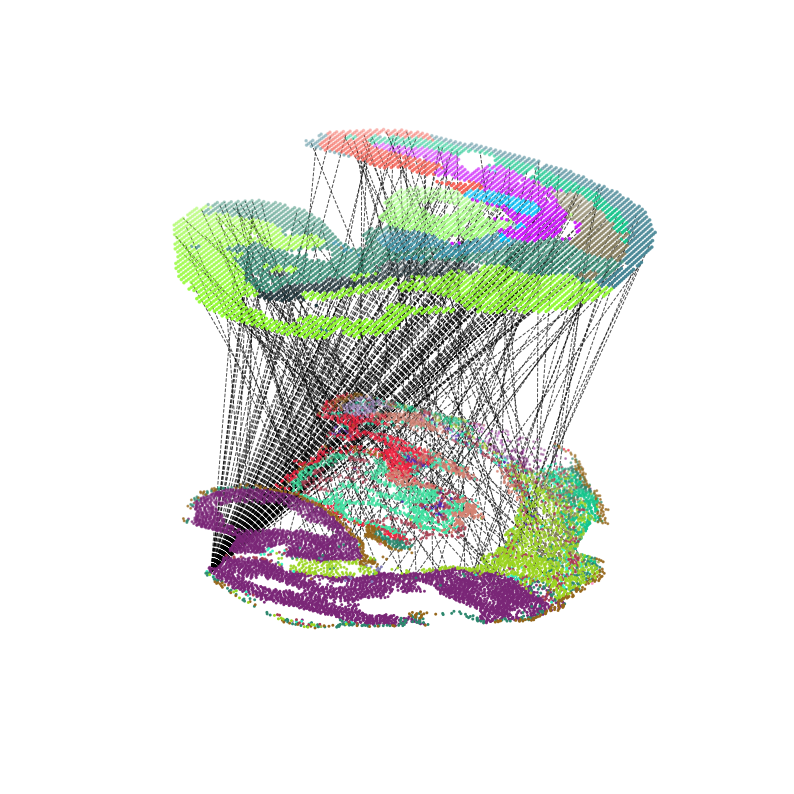

In [21]:
multi_align = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                             scale_coordinate=True, subsample_size=300, exchange_xy=False)

multi_align.draw_3D(size=[10, 12], line_width=0.7, line_color='black', point_size=[1.25,2.5], 
                    hide_axis=True, show_error=False)

/rd2/user/xiacr/SLAT/case/spatial_cross_platform/other_methods/../../../scSLAT/viz/multi_dataset.py:204: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 21 cell types; dataset2: 11 cell types; 
                    Total :29 celltypes; Overlap: 3 cell types 
                    Not overlap :[['Anterior somitic tissues', 'Haematoendothelial progenitors', 'Forebrain/Midbrain/Hindbrain', 'Erythroid', 'NMP', 'Surface ectoderm', 'Mixed mesenchymal mesoderm', 'Allantois', 'Blood progenitors', 'Presomitic mesoderm', 'Lateral plate mesoderm', 'Splanchnic mesoderm', 'Cranial mesoderm', 'Endothelium', 'ExE endoderm', 'Cardiomyocytes', 'Definitive endoderm', 'Intermediate mesoderm', 'AGM', 'Mesenchyme', 'Connective tissue', 'Brain', 'Heart', 'Liver', 'Notochord', 'Branchial arch']]
Subsample 800 cell pairs from 5031


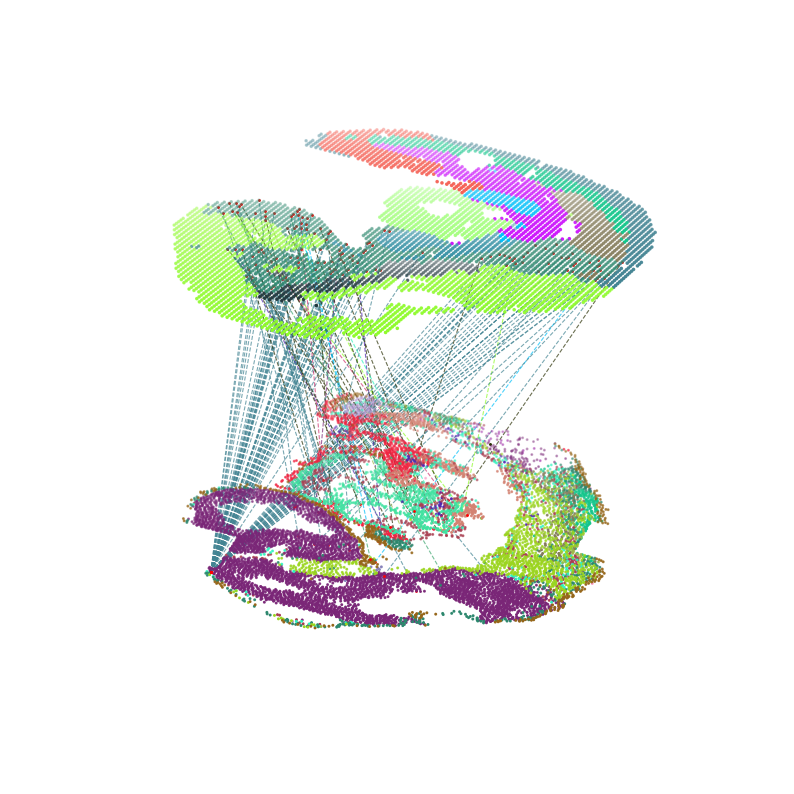

In [20]:
test = match_3D_celltype(adata1_df, adata2_df, matching, meta='celltype', highlight_celltype=[list(set(adata1_df.celltype)),['Neural crest']],
                         subsample_size=800, highlight_cell=['red'], scale_coordinate=True)
test.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.25,2.5], hide_axis=True)